<h1 style="color:orange">EXERCISE CLASS 3 (Part 3/3)</h1>

# Exercise 3

A company that produces tomato sauce is testing a new accurate system to control the level of sauce in each bottle. To this aim, they are monitoring the level in each bottle by using an automated optical system that measures the deviation (in mm) of the sauce level from a target level.

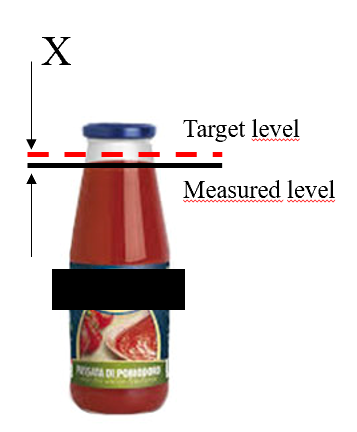

The data for 300 consecutive measurements are reported in the provided file "ESE3_es3_data.csv".
Since the measured data are auto-correlated, check if:
- Data batching is suitable to get rid of the data auto-correlation
- Data gapping is suitable to get rid of the data auto-correlation
- Comment the results

In [2]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the library for hypothesis testing scipy
import scipy.stats as stats

# Import the dataset
data = pd.read_csv('ESE3_es3_data.csv')

data.head()

,Ex3
0,1.000000
1,0.800000
2,1.100000
3,1.036429
4,0.396703


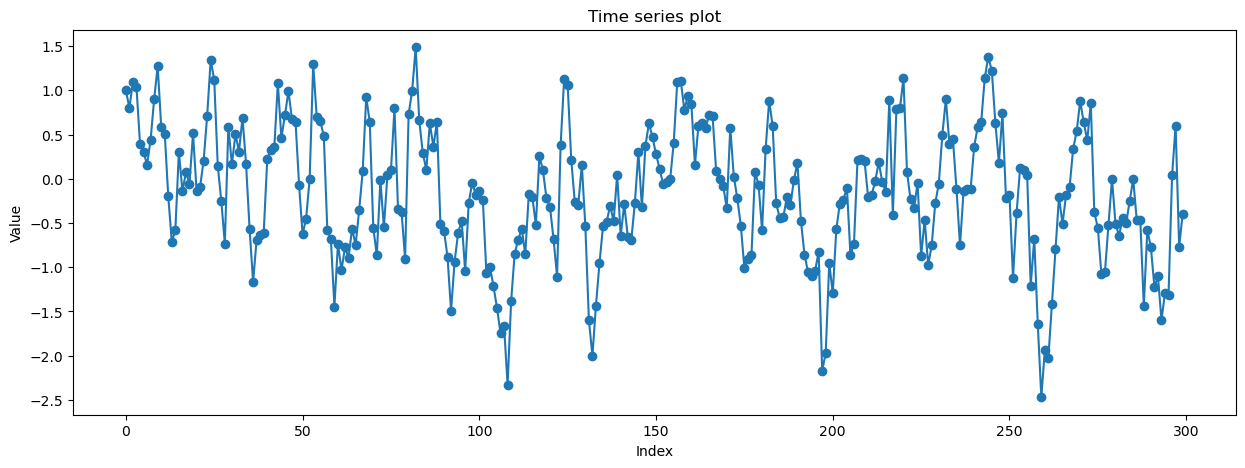

In [3]:
#Time series plot
plt.figure(figsize=(15, 5))
plt.plot(data, 'o-')
plt.title('Time series plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()


In [4]:
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

stat_runs, pval_runs = runstest_1samp(data['Ex3'], correction=False)
print('Runs test statistic = {:.3f}'.format(stat_runs))
print('Runs test p-value = {:.3f}'.format(pval_runs))
alfa=0.05
if pval_runs < alfa:
    print('Reject H0: the data are not random')
else:
    print('Accept H0: the data are random')
    

Runs test statistic = -9.831
Runs test p-value = 0.000
Reject H0: the data are not random


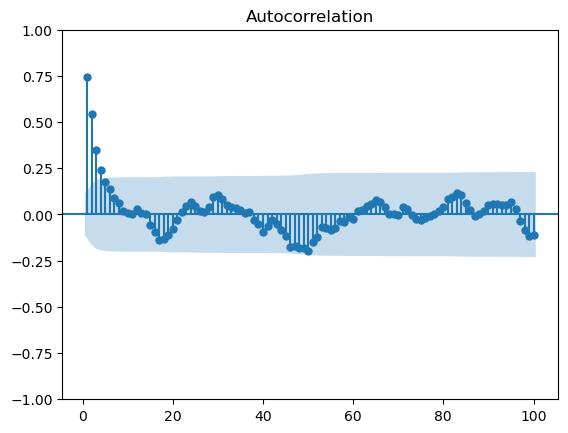

In [13]:
# Plot the acf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt

sgt.plot_acf(data['Ex3'], lags = int(len(data)/3), zero=False)
plt.show()


The data are auto-correlated, check if:
1. Data gapping is suitable to get rid of the data autocorrelation. 
2. Data batching is suitable to get rid of the data autocorrelation. 

> Let's try data gapping first. 

In [6]:
#Gapping 
gap_size= 6 # this is just an example, you can try different gapping intervals
gap_num= int(len(data)/gap_size)

gap_data= np.zeros((gap_num))
for i in range (gap_num):
    gap_data[i]=data['Ex3'][i*6]

> Alternatively, use the built-in array manipulation functionalities:

In [7]:
# Take one data point every 6
gap_data = data['Ex3'][::gap_size]

> Let's analyze data after gapping

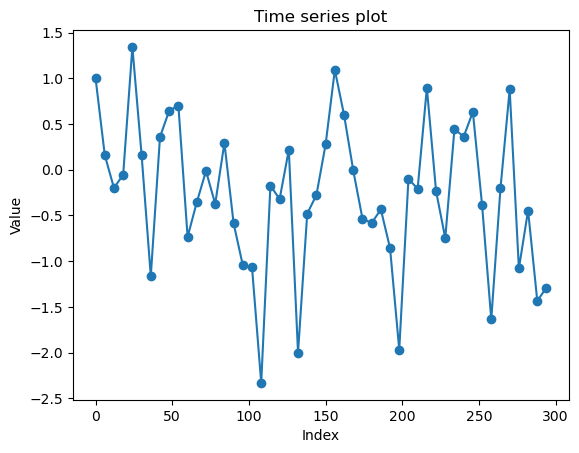

In [8]:
#Time series plot and runs test
plt.plot(gap_data, 'o-')
plt.title('Time series plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()


In [9]:
# Runs test
stat_runs, pval_runs = runstest_1samp(gap_data, correction=False)
print('Runs test statistic = {:.3f}'.format(stat_runs))
print('Runs test p-value = {:.3f}'.format(pval_runs))
alpha=0.05
if pval_runs < alpha:
    print('Reject H0: the data are not random')
else:
    print('Accept H0: the data are random')
    

Runs test statistic = -1.706
Runs test p-value = 0.088
Accept H0: the data are random


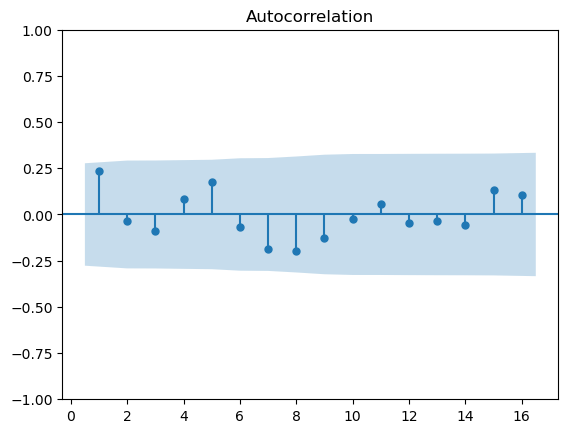

In [15]:
# Plot the acf using the statsmodels library

sgt.plot_acf(gap_data, lags = int(len(gap_data)/3), zero=False)
plt.show()

In [17]:
from statsmodels.tsa.stattools import acf

#autocorrelation function
[acf_value, lbq, _] = acf(gap_data, nlags = int(len(gap_data)/3) , qstat=True)

#Bartlett's test at lag 1
lag_test=1
rk=abs(acf_value[lag_test])
alpha = 0.05 # significance level
z_alpha2 = stats.norm.ppf(1-alpha/2)
print('Test statistic rk = %f' % rk)
print('Rejection region starts at %f' % (z_alpha2/np.sqrt(len(gap_data))))

if rk>z_alpha2/np.sqrt(len(gap_data)):
    print('The null hypothesis is rejected')
else: 
    print('The null hypothesis is accepted')


Test statistic rk = 0.232564
Rejection region starts at 0.277181
The null hypothesis is accepted


> Let's try with batching. Create 50 subgroups of size 6. 

In [18]:
# Batching
batch_size = 6
batch_num = int(len(data)/batch_size)

j=0
batch_data= np.zeros((batch_num))
for i in range (batch_num):
    batch_data[i]=np.sum(data['Ex3'][j:j+5])/batch_size
    j=j+6

In [ ]:
# Alternative method
# Create a new column in the dataframe with the corresponding batch number
data['Batch'] = np.repeat(np.arange(1, batch_num+1), batch_size)

# Store the batch means in a new dataframe
batch_data = data.groupby('Batch').mean()

Let's analyze data after batching

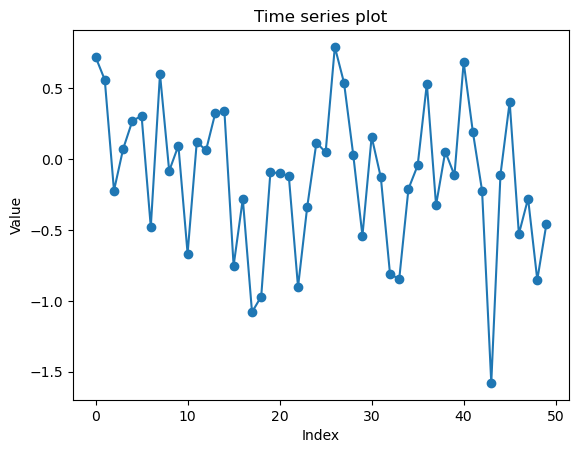

In [19]:
#Time series plot
plt.plot(batch_data, 'o-')
plt.title('Time series plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()


> Check if the data are random.

In [ ]:
# Runs test 
stat_runs, pval_runs = runstest_1samp(batch_data, correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))
alpha=0.05
if pval_runs < alpha:
    print('Reject H0: the data are not random')
else:
    print('Accept H0: the data are random')
    

Runs test p-value = 0.102
Accept H0: the data are random


> Now check for autocorrelation.

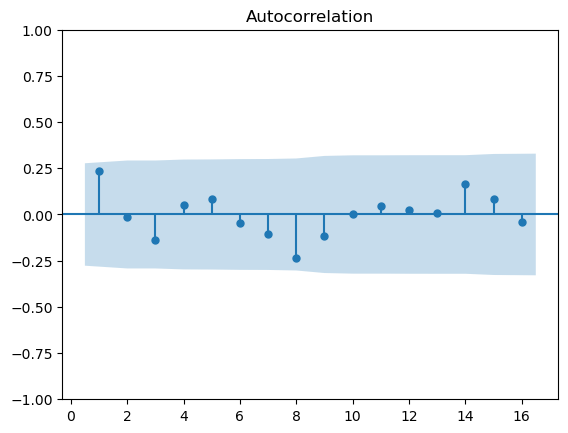

In [20]:
# Plot the acf using the statsmodels library

sgt.plot_acf(batch_data, lags = int(len(batch_data)/3), zero=False)

plt.show()

In [21]:
from statsmodels.tsa.stattools import acf
#autocorrelation function
[acf_value, lbq, _] = acf(batch_data, nlags = int(len(batch_data)/3), qstat=True)

#Bartlett's test at lag 1
lag_test=1
rk=abs(acf_value[lag_test])
alpha = 0.05 # significance level
z_alpha2 = stats.norm.ppf(1-alpha/2)
print('Test statistic rk = %f' % rk)
print('Rejection region starts at %f' % (z_alpha2/np.sqrt(len(batch_data))))

if rk>z_alpha2/np.sqrt(len(batch_data)):
    print('The null hypothesis is rejected')
else: 
    print('The null hypothesis is accepted')


Test statistic rk = 0.234721
Rejection region starts at 0.277181
The null hypothesis is accepted
